### KNN Imputer:

1. We use the values of the same column where the value is missing to fill in the NA row , like in simple imputer.
2. But, in KNN imputer we not only use that column where value is missing but also other features (columns).

### Procedure:

1. We have to find 'K' nearest neighbours.
2. Find the value.
3. In the below image if we want to fill 'column1' of row-2 , then we can calculate 'K' nearest neighbours and take mean of those rows.

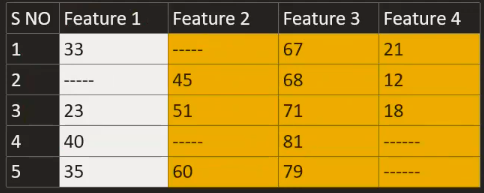

### How to find K nearest neighbours:

1. There is formulae named NaN_Euclidean distance.
2. We know Simple Euclidean distance formaule= sqrt(sq. distance of coordinates)
3. But as seen above if we apply simple formulae then there are some NaN values for which don't have values.
4. So, here comes NaN Euclidean distance:

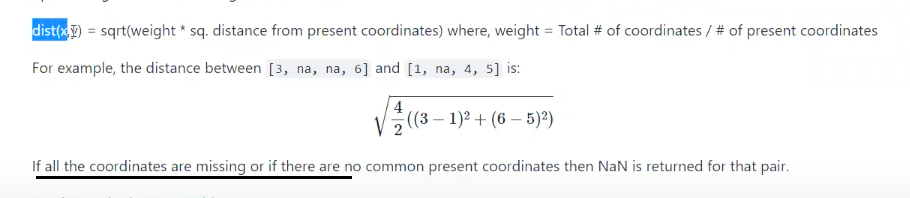

### Calculating Euclidean distance:

1. We want to find out Euclidean distnace of row2 with other rows 1,3,4,5 and that's caluclated below:
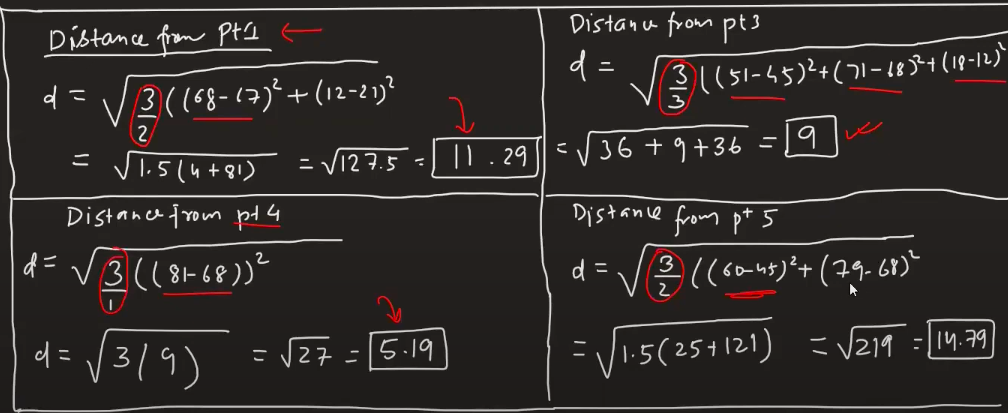

2. We can see row4 has least distance and then row3
3. So, in order to find row2-column1 value we will take average of column1 values of row4 and row3
4. that is, 23+42/2

### Advantages and Disadvantages:
1. More accurate then mean and median imputing.
2. More number of calculations (Diss)
3. We need to keep the training data in production , so that we can do the calculations.(Diss)

In [11]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.linear_model import LogisticRegression

In [12]:
df=pd.read_csv('train.csv')[['age','pclass','fare','survived']]

In [13]:
df

,age,pclass,fare,survived
0,22.0,3,7.2500,0
1,38.0,1,71.2833,1
2,26.0,3,7.9250,1
3,35.0,1,53.1000,1
4,35.0,3,8.0500,0
...,...,...,...,...
886,27.0,2,13.0000,0
887,19.0,1,30.0000,1
888,NaN,3,23.4500,0
889,26.0,1,30.0000,1


In [14]:
df.isnull().mean()*100

age         19.86532
pclass       0.00000
fare         0.00000
survived     0.00000
dtype: float64

In [16]:
X = df.drop(columns=['survived'])
y = df['survived']

In [17]:
X

,age,pclass,fare
0,22.0,3,7.2500
1,38.0,1,71.2833
2,26.0,3,7.9250
3,35.0,1,53.1000
4,35.0,3,8.0500
...,...,...,...
886,27.0,2,13.0000
887,19.0,1,30.0000
888,NaN,3,23.4500
889,26.0,1,30.0000


In [18]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [21]:
X_train

,age,pclass,fare
30,40.0,1,27.7208
10,4.0,3,16.7000
873,47.0,3,9.0000
182,9.0,3,31.3875
876,20.0,3,9.8458
...,...,...,...
534,30.0,3,8.6625
584,NaN,3,8.7125
493,71.0,1,49.5042
527,NaN,1,221.7792


In [23]:
knn = KNNImputer(n_neighbors=3,weights='distance')

X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.transform(X_test)

In [25]:
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

lr.fit(X_train_trf,y_train)

y_pred = lr.predict(X_test_trf)

accuracy_score(y_test,y_pred)

0.7150837988826816

In [26]:
# Comparision with Simple Imputer --> mean

si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [27]:
lr = LogisticRegression()

lr.fit(X_train_trf2,y_train)

y_pred2 = lr.predict(X_test_trf2)

accuracy_score(y_test,y_pred2)

0.6927374301675978